In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
heart_df = pd.read_csv("heart.csv")

In [3]:
X = heart_df.drop("target", axis=1)
y = heart_df["target"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)

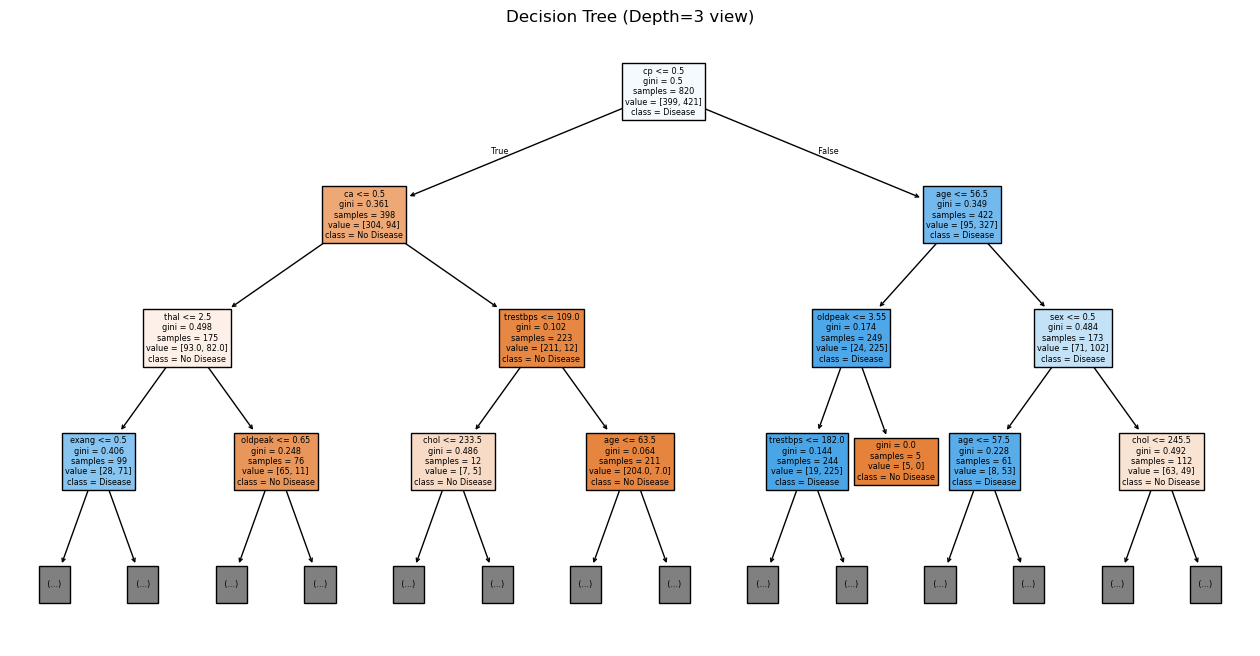

In [6]:
plt.figure(figsize=(16, 8))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"],
          filled=True, max_depth=3)
plt.title("Decision Tree (Depth=3 view)")
plt.show()

In [7]:
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)
y_pred_pruned = dt_pruned.predict(X_test)
dt_pruned_acc = accuracy_score(y_test, y_pred_pruned)

In [8]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

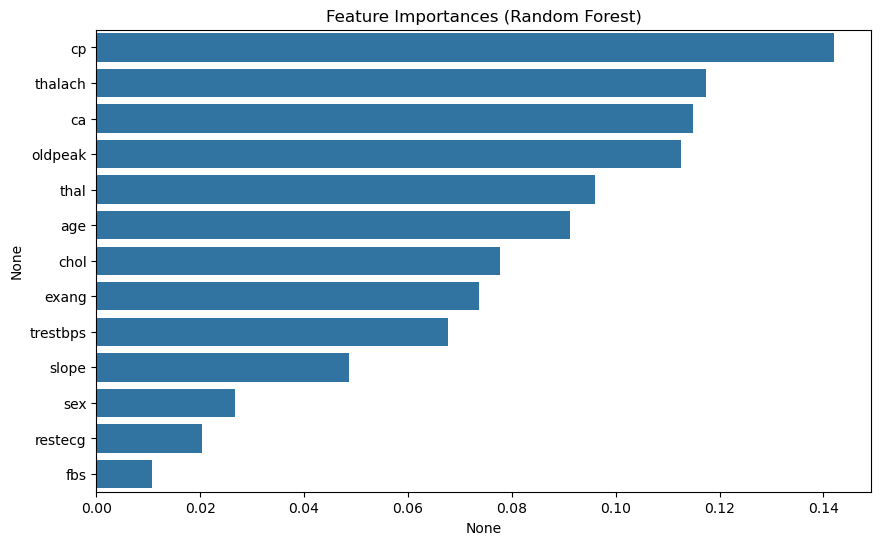

In [9]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importances (Random Forest)")
plt.show()

In [10]:
cv_scores_dt = cross_val_score(dt_pruned, X, y, cv=5)
cv_scores_rf = cross_val_score(rf, X, y, cv=5)

In [11]:
print(f"Decision Tree (Default) Accuracy: {dt_acc:.4f}")
print(f"Decision Tree (Pruned, Depth=4) Accuracy: {dt_pruned_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"CV Mean Accuracy (Decision Tree, Depth=4): {cv_scores_dt.mean():.4f}")
print(f"CV Mean Accuracy (Random Forest): {cv_scores_rf.mean():.4f}")

Decision Tree (Default) Accuracy: 0.9854
Decision Tree (Pruned, Depth=4) Accuracy: 0.8390
Random Forest Accuracy: 1.0000
CV Mean Accuracy (Decision Tree, Depth=4): 0.8341
CV Mean Accuracy (Random Forest): 0.9971


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



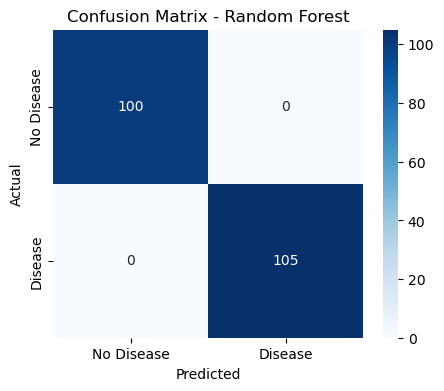

In [12]:
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix - Random Forest")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()